<a href="https://www.kaggle.com/code/nigamshitij/basic-pytorch-neural-network-deep-learning-model?scriptVersionId=177006226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#boiletplate imports

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from pathlib import Path

iskaggle = os.environ.get("KAGGLE_KERNEL_RUN_TYPE", "")
if iskaggle:
    path = Path('../input/titanic') # /kaggle/input/titanic

import torch
import numpy as np
import pandas as pd

np.set_printoptions(linewidth = 140)
torch.set_printoptions(linewidth = 140, sci_mode = False, edgeitems = 7)
pd.set_option('display.width', 140)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# cleaning up data
dataframe = pd.read_csv(path/'train.csv')
dataframe.describe()

# check for and remove NaNs
dataframe.isna().sum() # older dataframe
modes = dataframe.mode().iloc[0] # for bimodal distributions, take the first one / lower value
dataframe.fillna(modes, inplace = True)
dataframe.isna().sum() # new dataframe without #s

dataframe.describe()
dataframe.describe(include = (np.number))
# dataframe.describe(include = 'object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


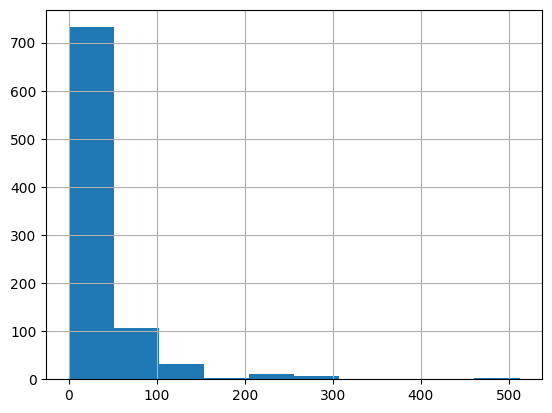

In [4]:
# pd.DataFrame.iloc??
# run through data
dataframe['Fare'].hist()
pclasses = sorted(dataframe['Pclass'].unique())
# pclasses

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

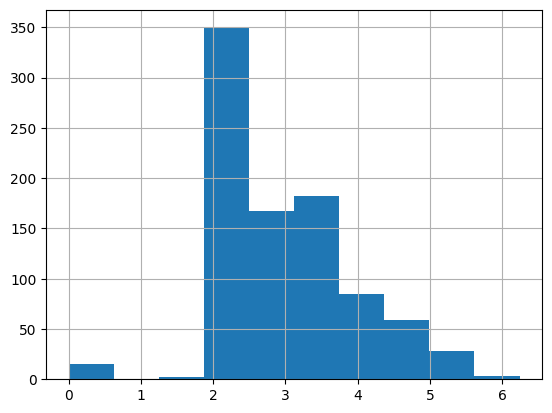

In [5]:
# create new columns
dataframe['LogFare'] = np.log(dataframe['Fare']+1)
dataframe['LogFare'].hist()
dataframe = pd.get_dummies(dataframe, columns = ['Sex', 'Pclass', 'Embarked'], dtype = float) # initially returns true/false; have to change to numbers
dataframe.columns
# dataframe.describe(include = 'object')

In [6]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
dataframe[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
from torch import tensor

# create independent variables as tensors
x_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
t_independent = tensor(dataframe[x_cols].values, dtype = torch.float)
print("T-ind Shape: ", t_independent.shape, "| T-ind Rank", len(t_independent.shape))

# create dependent variables as tensors
t_dependent = tensor(dataframe['Survived'])
print("T-dep Shape: ", t_dependent.shape, "| T-dep Rank", len(t_dependent.shape))

# normalize independent variables
values, indices = t_independent.max(dim = 0)
t_independent = t_independent / values
t_independent

# # create coefficients as tensors
torch.manual_seed(442)
n_coefficients = t_independent.shape[1]
coeff_mult = 0.1
coefficients = torch.randn(n_coefficients)*coeff_mult

# broadcasting tests
print("T_indep[0]: ", t_independent[0])
print("Coefficients: ", coefficients)
print("T_indep[0]*coeff: ", t_independent[0]*coefficients)
print("T_indep*coeff: ", t_independent[0:5]*coefficients)

T-ind Shape:  torch.Size([891, 12]) | T-ind Rank 2
T-dep Shape:  torch.Size([891]) | T-dep Rank 1
T_indep[0]:  tensor([0.2750, 0.1250, 0.0000, 0.3381, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000])
Coefficients:  tensor([-0.0663,  0.2191,  0.1691, -0.1328,  0.0104,  0.1511, -0.0394,  0.0383, -0.0974, -0.0208, -0.1634, -0.0808])
T_indep[0]*coeff:  tensor([-0.0182,  0.0274,  0.0000, -0.0449,  0.0000,  0.1511, -0.0000,  0.0000, -0.0974, -0.0000, -0.0000, -0.0808])
T_indep*coeff:  tensor([[-0.0182,  0.0274,  0.0000, -0.0449,  0.0000,  0.1511, -0.0000,  0.0000, -0.0974, -0.0000, -0.0000, -0.0808],
        [-0.0315,  0.0274,  0.0000, -0.0911,  0.0104,  0.0000, -0.0394,  0.0000, -0.0000, -0.0208, -0.0000, -0.0000],
        [-0.0216,  0.0000,  0.0000, -0.0466,  0.0104,  0.0000, -0.0000,  0.0000, -0.0974, -0.0000, -0.0000, -0.0808],
        [-0.0290,  0.0274,  0.0000, -0.0849,  0.0104,  0.0000, -0.0394,  0.0000, -0.0000, -0.0000, -0.0000, -0.0808],
        [-0.0290,  0.0000,  

In [8]:
# create predictions
predictions = (t_independent * coefficients).sum(axis = 1)
print("Predictions: ", predictions[0:5])
print("pred shape: ", predictions.shape)

# create loss function
loss = torch.abs(predictions - t_dependent).mean()
print("Loss: ", loss)

# create functions
def calc_predictions(coefficients, t_independent):
    predictions = (t_independent * coefficients).sum(axis = 1)
    return predictions

def calc_loss(coefficients, t_independent, t_dependent):
    predictions = calc_predictions(coefficients, t_independent)
    loss = torch.abs(predictions - t_dependent).mean()
    return loss

Predictions:  tensor([-0.0629, -0.1451, -0.2360, -0.1964, -0.1031])
pred shape:  torch.Size([891])
Loss:  tensor(0.4875)


In [9]:
# begin adding gradients
coefficients.requires_grad_()

# calculate loss using function
loss = calc_loss(coefficients, t_independent, t_dependent)
print("Pre-run grad (one-time only): ", coefficients.grad)

# run a single backward loop
loss.backward()
print("Post-run grad (one-time only): ", coefficients.grad)

# move coefficients forward by one step
with torch.no_grad():
    step = coefficients.grad * 0.1
    coefficients.sub_(step)
    loss = calc_loss(coefficients, t_independent, t_dependent) 
    print("Loss after one step for coefficients is: ", loss)

Pre-run grad (one-time only):  None
Post-run grad (one-time only):  tensor([-0.2637, -0.0292, -0.0412, -0.3500, -0.3524, -0.3827, -0.2245, -0.0112, -0.4994, -0.1526, -0.0864, -0.4961])
Loss after one step for coefficients is:  tensor(0.4389)


In [10]:
# torch.sub??
from fastai.data.transforms import RandomSplitter

# split data into training and split indices
training_split, validation_split = RandomSplitter(seed = 42)(dataframe)
print("Training len: ", len(training_split), "Validation len: ", len(validation_split))

# extract independent and dependent training and validation data
training_t_dependent = t_dependent[training_split]
validation_t_dependent = t_dependent[validation_split]
training_t_independent = t_independent[training_split]
validation_t_independent = t_independent[validation_split]
print("Training t dep len: ", len(training_t_dependent), "| Validation t dep len: ", len(validation_t_dependent))

Training len:  713 Validation len:  178
Training t dep len:  713 | Validation t dep len:  178


In [11]:
# RandomSplitter??
# create functions

# define function to update coefficients using grad
def update_coefficients(coefficients, learning_rate):
    step = coefficients.grad * learning_rate
    coefficients.sub_(step)

# define one epoch / backward pass
def one_epoch(coefficients, learning_rate):
    loss = calc_loss(coefficients, training_t_independent, training_t_dependent)
    loss.backward()
    with torch.no_grad():
        update_coefficients(coefficients, learning_rate)
    print(f"{loss:.3f}", end = "; ")

# initialize coefficients
def init_coefficients():
    coeff_sub = 0.5
    coefficients = (torch.rand(n_coefficients) - coeff_sub).requires_grad_()
    return coefficients

# model †rainer loop with epochs specified
def train_model(epochs = 30, learning_rate = 0.01):
    torch.manual_seed(442)
    coefficients = init_coefficients()
    for i in range(epochs):
        one_epoch(coefficients, learning_rate)
    return coefficients

# run model to get coefficients
coefficients = train_model(18, learning_rate = 0.02)

# show coefficients attached to each variable
def show_coefficients():
    # x_cols = independent columns
    return dict(zip(x_cols, coefficients.requires_grad_(False)))

show_coefficients()

0.518; 0.515; 0.510; 0.501; 0.491; 0.480; 0.467; 0.453; 0.435; 0.411; 0.388; 0.366; 0.346; 0.328; 0.310; 0.295; 0.288; 0.298; 

{'Age': tensor(-0.2206),
 'SibSp': tensor(0.1000),
 'Parch': tensor(0.2525),
 'LogFare': tensor(0.1055),
 'Sex_female': tensor(0.3394),
 'Sex_male': tensor(-0.4260),
 'Pclass_1': tensor(0.8616),
 'Pclass_2': tensor(0.4278),
 'Pclass_3': tensor(0.2830),
 'Embarked_C': tensor(0.1840),
 'Embarked_Q': tensor(0.3343),
 'Embarked_S': tensor(0.1067)}

In [12]:
# measure accuracy

# use new coefficients to multiply with validation
predictions = calc_predictions(coefficients, validation_t_independent) 
results = validation_t_dependent.bool() == (predictions > 0.5)
print(results[:16])
print(results.float().mean())

# pop into function
def accuracy(coefficients):
    predictions = calc_predictions(coefficients, validation_t_independent)
    results = validation_t_dependent.bool() == (predictions > 0.5)
    return results.float().mean()

accuracy(coefficients)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])
tensor(0.7921)


tensor(0.7921)

In [13]:
# sigmoid function 
predictions[:28]

# import log functions
import sympy
# sympy.plot("1/(1+exp(-x))", xlim = (-10, 10)) # draw plot

# redefine calc_predictions
def calc_predictions(coefficients, t_independent):
#     predictions = (t_independent * coefficients).sum(axis = 1)
    predictions = torch.sigmoid((t_independent * coefficients).sum(axis = 1))
    return predictions

# rerun model using new prediction calculator
coefficients = train_model(learning_rate = 2.5)
print("Accuracy: ", accuracy(coefficients))
show_coefficients()

0.503; 0.451; 0.372; 0.322; 0.295; 0.272; 0.250; 0.230; 0.217; 0.209; 0.206; 0.204; 0.204; 0.204; 0.204; 0.204; 0.205; 0.205; 0.205; 0.204; 0.204; 0.203; 0.202; 0.200; 0.199; 0.197; 0.196; 0.195; 0.194; 0.193; Accuracy:  tensor(0.8258)


{'Age': tensor(-1.8660),
 'SibSp': tensor(-1.5876),
 'Parch': tensor(-0.2555),
 'LogFare': tensor(2.1401),
 'Sex_female': tensor(18.3703),
 'Sex_male': tensor(-21.1656),
 'Pclass_1': tensor(8.7356),
 'Pclass_2': tensor(4.6511),
 'Pclass_3': tensor(-14.5229),
 'Embarked_C': tensor(3.7170),
 'Embarked_Q': tensor(1.2643),
 'Embarked_S': tensor(-7.0650)}

In [14]:
# submission via conversion to csv

# read test file
test_dataframe = pd.read_csv(path/'test.csv')

# fill up blank fares with mode
test_dataframe['Fare'] = test_dataframe.Fare.fillna(0)
test_dataframe.fillna(modes, inplace = True)

# create other columns
# create log of fare as separate column; add 1 to make it 0 to 1
test_dataframe['LogFare'] = np.log(test_dataframe['Fare']+1)
test_dataframe = pd.get_dummies(test_dataframe, columns = ['Sex', 'Pclass', 'Embarked'], dtype = float)

# define independent test variables
test_t_independent = tensor(test_dataframe[x_cols].values, dtype = torch.float) # x cols are the independent columns defined earlier
test_t_independent = test_t_independent / values # divide by max defined earlier to normalize

# fill up survived column
test_dataframe['Survived'] = (calc_predictions(coefficients, test_t_independent)>0.5).int()
test_dataframe.head()

# create submission dataframe
submission_dataframe = test_dataframe[['PassengerId', 'Survived']]
submission_dataframe.to_csv('sub.csv', index = False)

In [15]:
# print(test_dataframe[x_cols])

!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [16]:
# matrix multiplication

print((validation_t_independent*coefficients).sum(axis = 1))
print(validation_t_independent@coefficients)

tensor([ 24.6145, -34.2407, -31.8085, -22.5211, -23.2576, -23.5110,   8.3436,  16.2083, -42.5274,   7.8441, -42.7493, -31.8163, -42.2319,
          5.3007, -42.8558, -19.4075, -19.8740,  16.4609, -23.3589,  -3.1621, -42.5638, -19.6640,  31.2899,  15.9899, -42.5048, -34.0766,
         -2.6260, -19.8040, -42.3722,   5.2957,  16.3564,  -3.3414, -42.4472, -42.7095,  24.4746,  -2.9518, -19.3718,  31.7215, -42.5579,
         -3.2486, -23.1851, -42.5579, -23.3858,  31.5674, -42.4646,  -3.1160, -41.9705, -42.5139, -34.2731,  -3.0071, -11.0421, -42.7140,
        -42.6498, -42.6214, -23.3484, -23.4883, -34.2402, -42.8293, -42.4879, -42.4447,  -8.2610, -42.6331, -20.1834, -42.4927,  15.8619,
        -18.5321, -23.2343, -42.5573, -34.6370,  15.8238, -42.6105,   7.8754, -23.4650, -42.5069, -18.9255, -42.3819, -42.5579, -19.0329,
        -23.1177, -23.7250, -22.7773,  31.7623, -42.5405, -42.5896,  15.6277, -12.3778,  -7.7197,  21.0754,  26.9907, -23.2110, -42.7329,
        -42.5579,  31.7270, -31.94

In [17]:
# redefine calc_predictions
def calc_predictions(coefficients, t_independent):
    predictions = torch.sigmoid(t_independent @ coefficients)
    return predictions

# redefine coefficient initializer
def init_coefficients():
    coeff_sub = 0.1
    coefficients = (torch.rand(n_coefficients,1) * coeff_sub).requires_grad_()
    return coefficients

# add axis to independent variables (similar to init_coefficients adding an axis to coefficients)
training_t_dependent = training_t_dependent[:, None]
validation_t_dependent = validation_t_dependent[:, None]

# train model and print accuracy
coefficients = train_model(learning_rate = 10)
print(accuracy(coefficients))
show_coefficients()

0.512; 0.344; 0.281; 0.241; 0.213; 0.204; 0.203; 0.203; 0.204; 0.203; 0.202; 0.200; 0.198; 0.195; 0.194; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; tensor(0.8258)


{'Age': tensor([-4.3650]),
 'SibSp': tensor([-4.8763]),
 'Parch': tensor([-2.1442]),
 'LogFare': tensor([3.0420]),
 'Sex_female': tensor([37.5161]),
 'Sex_male': tensor([-45.4039]),
 'Pclass_1': tensor([17.0499]),
 'Pclass_2': tensor([9.6839]),
 'Pclass_3': tensor([-34.4056]),
 'Embarked_C': tensor([6.6477]),
 'Embarked_Q': tensor([3.0086]),
 'Embarked_S': tensor([-17.4230])}

In [18]:
## neural net

# initialize all coefficients in layers
def init_coefficients(n_hidden = 20):
    layer_1 = (torch.rand(n_coefficients, n_hidden) - 0.1) / n_hidden # number of coefficients = shape of t_independent
    layer_2 = torch.rand(n_hidden, 1) - 0.5 # layer 2 
    constant = torch.rand(1)[0]
    return layer_1.requires_grad_(), layer_2.requires_grad_(), constant.requires_grad_() # tuple

import torch.nn.functional as F

# redefine calc predictions
def calc_predictions(coefficients, t_independent):
    layer_1, layer_2, constant = coefficients
    result = F.relu(t_independent@layer_1)
    result = (result@layer_2) + constant
    return torch.sigmoid(result)

# redefine update coefficients
def update_coefficients(coefficients, learning_rate):
    for layer in coefficients:
        layer.sub_(layer.grad * learning_rate)
        layer.grad.zero_()
    
# train and determine accuracy
coefficients = train_model(learning_rate = 1.4)
accuracy(coefficients)
# show_coefficients()


0.542; 0.500; 0.457; 0.409; 0.366; 0.334; 0.313; 0.297; 0.284; 0.273; 0.263; 0.256; 0.250; 0.245; 0.241; 0.238; 0.235; 0.232; 0.230; 0.228; 0.226; 0.225; 0.223; 0.222; 0.221; 0.220; 0.219; 0.218; 0.217; 0.216; 

tensor(0.8371)

In [19]:
hiddens = [10, 10]
sizes = [n_coefficients] + hiddens + [1]
n_coefficients, hiddens, sizes, len(sizes)
# torch.rand??

(12, [10, 10], [12, 10, 10, 1], 4)

In [20]:
## deep learning - n hidden layers

## initialize all coefficients with n layers
def init_coefficients():
    hiddens = [10, 10]
    sizes = [n_coefficients] + hiddens + [1]
    n = len(sizes) # 4
    
    layers = []
    for i in range(n-1):
        layer = torch.rand(sizes[i], sizes[i+1]) - 0.3
        print("i (layer) = ", i, "| layer shape:", layer.shape)
        layer = layer / sizes[i+1] * 4
        layers.append(layer)
    # layers = [(torch.rand(sizes[i], sizes[i+1])-0.3) / sizes[i+1]*4 for i in range(n-1)]
    
    constants = []
    for i in range(n-1):
        constant = (torch.rand(1)[0] - 0.5) * 0.1
        print("i (const) = ", i, "| const shape:", constant.shape)
        constants.append(constant)
    # constants = [(torch.rand(1)[0] - 0.5)*0.1 for i in range(n-1)]
    
    for l in layers + constants:
        l.requires_grad_()
        
    return layers, constants

import torch.nn.functional as F

# reinitialize prediction calculations
def calc_predictions(coefficients, t_independent):
    layers, constants = coefficients
    n = len(layers)
    results = t_independent
    
    for const, layer in enumerate(layers):
        results = results@layer + constants[const]
        # if it isn't the last layer, chuck into relu
        if const != n-1:
            results = F.relu(results)
    
    return torch.sigmoid(results)

# update coefficients
def update_coefficients(coefficients, learning_rate):
    layers, constants = coefficients
    for layer in layers + constants:
        layer.sub_(layer.grad * learning_rate)
        layer.grad.zero_()

coefficients = train_model(learning_rate = 4)
accuracy(coefficients)

i (layer) =  0 | layer shape: torch.Size([12, 10])
i (layer) =  1 | layer shape: torch.Size([10, 10])
i (layer) =  2 | layer shape: torch.Size([10, 1])
i (const) =  0 | const shape: torch.Size([])
i (const) =  1 | const shape: torch.Size([])
i (const) =  2 | const shape: torch.Size([])
0.514; 0.483; 0.469; 0.457; 0.446; 0.437; 0.429; 0.423; 0.418; 0.411; 0.376; 0.370; 0.364; 0.358; 0.348; 0.310; 0.227; 0.208; 0.209; 0.220; 0.205; 0.204; 0.211; 0.197; 0.196; 0.195; 0.194; 0.194; 0.194; 0.194; 

tensor(0.8258)

In [21]:
enumerate??

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     